Jason Zhang
jzhan127
HW4

# 1A

In [191]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

data = np.load('./HW4_Prob1_data.npy')
#np.random.shuffle(data)
train, test = data[0:50000], data[50000:]

In [192]:
# (500, 1000), (300, 800), (400, 600),
# (600, 600), (700, 800), (500, 600), (100, 400), (300, 200), (700, 200), (900, 400)
# 0:4 top pentagon 5:9 bottom pentagon starting from top point going counterclockwise
vertices = [[500, 1000], [300, 800], [400, 600], [600, 600], 
            [700, 800], [500, 600], [100, 400], [300, 200], 
            [700, 200], [900, 400]] 

In [193]:
class ManualMLP:
    def __init__(self, vertices):
        self.vertices = vertices
        self.points = len(vertices)
    def fit(self, data):
        self.data = data
        weights, biases = self.compute_weights()
        hidden_layer = self.hidden_output(weights, biases)
        and_layer = np.zeros([self.data.shape[0], 2])
        and_layer[:, 0] = np.prod(hidden_layer[0:5, :], axis = 0)
        and_layer[:, 1] = np.prod(hidden_layer[5:10, :], axis = 0)
        or_layer = np.sum(and_layer[:, 0:2], axis=1)
        pred = or_layer
        self.accuracy(pred)
        return pred
    def hidden_output(self, weights, biases):
        hidden_layer = np.zeros([self.points, self.data.shape[0]], dtype=int)
        hidden_layer[0, :] = np.multiply(self.data[:, 0], weights[0]) + biases[0] > self.data[:, 1]
        hidden_layer[1, :] = np.multiply(self.data[:, 0], weights[1]) + biases[1] < self.data[:, 1]
        hidden_layer[2, :] = np.multiply(self.data[:, 0], weights[2]) + biases[2] < self.data[:, 1]
        hidden_layer[3, :] = np.multiply(self.data[:, 0], weights[3]) + biases[3] < self.data[:, 1]
        hidden_layer[4, :] = np.multiply(self.data[:, 0], weights[4]) + biases[4] > self.data[:, 1]
        hidden_layer[5, :] = np.multiply(self.data[:, 0], weights[5]) + biases[5] > self.data[:, 1]
        hidden_layer[6, :] = np.multiply(self.data[:, 0], weights[6]) + biases[6] < self.data[:, 1]
        hidden_layer[7, :] = np.multiply(self.data[:, 0], weights[7]) + biases[7] < self.data[:, 1]
        hidden_layer[8, :] = np.multiply(self.data[:, 0], weights[8]) + biases[8] < self.data[:, 1]
        hidden_layer[9, :] = np.multiply(self.data[:, 0], weights[9]) + biases[9] > self.data[:, 1]
        return hidden_layer
    
    def compute_weights(self):
        weights = np.zeros(self.points)
        biases = np.zeros(self.points)
        weights[0], biases[0] = self.getLine(self.vertices[0], self.vertices[1])
        weights[1], biases[1] = self.getLine(self.vertices[1], self.vertices[2])
        weights[2], biases[2] = self.getLine(self.vertices[2], self.vertices[3])
        weights[3], biases[3] = self.getLine(self.vertices[3], self.vertices[4])
        weights[4], biases[4] = self.getLine(self.vertices[4], self.vertices[0])
        weights[5], biases[5] = self.getLine(self.vertices[5], self.vertices[6])
        weights[6], biases[6] = self.getLine(self.vertices[6], self.vertices[7])
        weights[7], biases[7] = self.getLine(self.vertices[7], self.vertices[8])
        weights[8], biases[8] = self.getLine(self.vertices[8], self.vertices[9])
        weights[9], biases[9] = self.getLine(self.vertices[9], self.vertices[5])
        
        return weights, biases
        
    def getLine(self, vertex_1, vertex_2):
        w = float((vertex_2[1] - vertex_1[1])/(vertex_2[0] - vertex_1[0]))
        b = vertex_1[1] - w*vertex_1[0]
        return w, b
        
    def accuracy(self, pred):
        count = 0
        samples = self.data.shape[0];
        for i in range(samples):
            if pred[i] == self.data[i][2]:
                count += 1
        print('Accuracy: '+ str(float(count/samples)*100) + '%')
        

In [194]:
manualMLP = ManualMLP(vertices)
manualMLP.fit(train)
pred = manualMLP.fit(test)

Accuracy: 100.0%
Accuracy: 100.0%


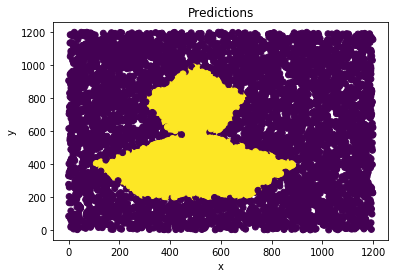

In [195]:
colors = ['red', 'green']
plt.scatter(x=test[:, 0], y=test[:, 1], c=pred[:])
plt.title('Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


# 1B

In [196]:
class TrainMLP:
    def __init__(self, rate, epochs): #set the iterations and the descent rate
        super().__init__() 
        self.rate = rate
        self.epochs = epochs
    def forward(self, X, W, W2, b, b2):
        layer1Out = np.add(np.dot(W, np.transpose(X)),  b)
        layer1Out = np.transpose(layer1Out)
        activatedLayer = self.sigmoid_func(layer1Out)
        layer2Out = np.add(np.dot(W2, np.transpose(activatedLayer)),  b2)
        layer2Out = np.transpose(layer2Out)
        y_hat = self.sigmoid_func(layer2Out) #examples x output
        return y_hat, activatedLayer
    
    def train(self, X, y):
        classes = np.unique(y).size
        #X: examples, features
        firstLayer = 10
        output = 1
        W = np.random.randn(firstLayer, X.shape[1])*np.sqrt(2/firstLayer) #firstlayerneurons, features
        b = np.random.randn(firstLayer, 1)*np.sqrt(2/firstLayer) #firstLayer, 1 
        W2 = np.random.randn(output, firstLayer)*np.sqrt(2/output)
        b2 = np.random.randn(output, 1)*np.sqrt(2/output)
        losses = np.zeros(self.epochs)
        acc = np.zeros(self.epochs)
        for j in range(5):
            for i in range(self.epochs):
                #one forward and back pass
                y_hat, activated_layer = self.forward(X, W, W2, b, b2)
                grads = self.grad(X, y, b, y_hat, activated_layer, W2)
                W -= self.rate*grads[0]
                b -= self.rate*grads[1]
                W2 -= self.rate*grads[2]
                b2 -= self.rate*grads[3]
                losses[i] = self.loss(y_hat, y)
                acc[i] = self.classification_accuracy(W, X, b, y, W2, b2)[0]
                if i%100 == 0:
                    print("Epoch: {0}, Training Accuracy: {1:.2f}%".format(i, acc[i]*100))
            self.plot(losses, acc)
        return W, W2, b, b2
    
    def sigmoid_func(self, y_hat):
        return 1 / (1 + np.exp(-1*y_hat))
    def predict(self, W:np.ndarray, X: np.ndarray, b:np.ndarray, W2, b2):
        outputs = self.forward(X, W, W2, b, b2)[0]
        outputs[outputs > 0.5] = 1
        outputs[outputs <= 0.5] = 0
        return outputs
    def loss(self, outputs: np.ndarray, y: np.ndarray):
        observations = y.shape[0]
        return -1*(np.dot(y, np.log(outputs)))/observations
    def grad(self, X, y, b, y_hat, activation, W2):
        
        samples = X.shape[0] #examples
        #Backpropagation of cross entropy loss
        y = y.reshape(y_hat.shape)
        #print(b.shape, W2.shape, activation.shape)
        grad_e_y = -(y/y_hat) + ((1-y)/(1-y_hat))# examples x ouput
        
        grad_e_w2 = (1/samples) * np.dot(np.transpose(np.multiply(grad_e_y, y_hat*(1-y_hat))), activation) #average across all samples
        grad_y_b2 = (y_hat)*(1-y_hat)
        grad_e_b2 = (1/samples) * np.dot(np.transpose(grad_e_y), grad_y_b2) #average across all samples
        grad_e_y2 = np.dot(np.multiply(grad_e_y, y_hat*(1-y_hat)), W2) #chain rule 5000x1 5000x1 1 x10
        sigmoid_derv = activation*(1-activation)
        grad_e_w1 = (1/samples) * np.dot(np.transpose(np.multiply(grad_e_y2, sigmoid_derv)), X)
        grad_y2_b1 = sigmoid_derv
        grad_e_b1 = (1/samples) * np.sum(np.multiply(grad_e_y2, grad_y2_b1), axis = 0)
        
        return grad_e_w1, grad_e_b1.reshape(grad_e_b1.shape[0], 1), grad_e_w2, grad_e_b2.reshape(grad_e_b2.shape[0], 1)
    
    def classification_accuracy(self, W:np.ndarray, X: np.ndarray, b:np.ndarray, y: np.ndarray, W2, b2):
        pred = self.predict(W, X, b, W2, b2)
        samples = y.shape[0]
        count = 0
        for i in range(samples):
            if pred[i] == y[i]:
                count = count + 1
        return count/samples, pred
    
    def plot(self, loss, acc):
        
        plt.plot(acc)
        plt.title('Accuracy per epoch')
        plt.xlabel('Epochs')
        plt.ylabel('%Accuracy')
        plt.show()
        
        plt.plot(loss)
        plt.title('Loss per epoch')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()
        
        print('Accuracy: ' + str(acc[-1]*100) + '%')

Epoch: 0, Training Accuracy: 61.66%
Epoch: 100, Training Accuracy: 63.60%
Epoch: 200, Training Accuracy: 65.62%


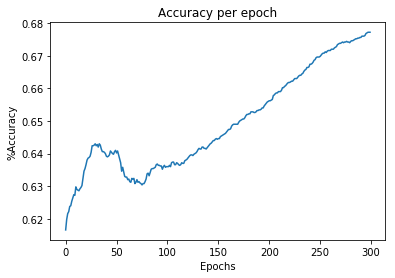

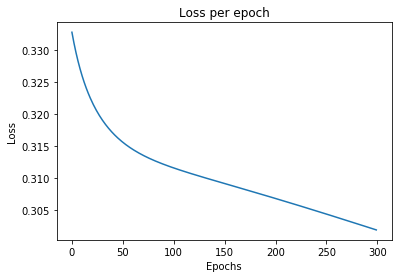

Accuracy: 67.72%
Epoch: 0, Training Accuracy: 67.76%
Epoch: 100, Training Accuracy: 69.72%
Epoch: 200, Training Accuracy: 71.66%


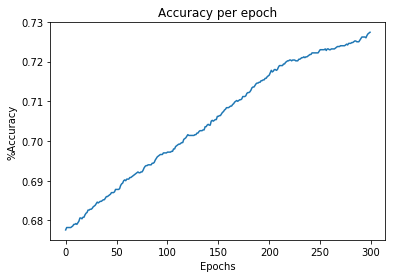

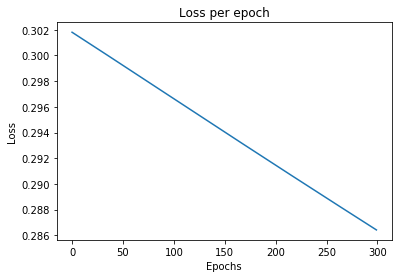

Accuracy: 72.74000000000001%
Epoch: 0, Training Accuracy: 72.72%
Epoch: 100, Training Accuracy: 73.98%
Epoch: 200, Training Accuracy: 74.72%


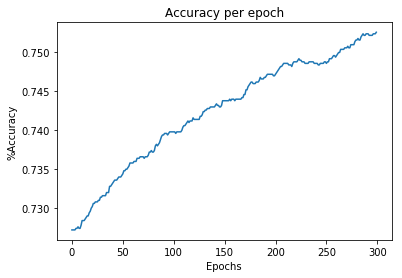

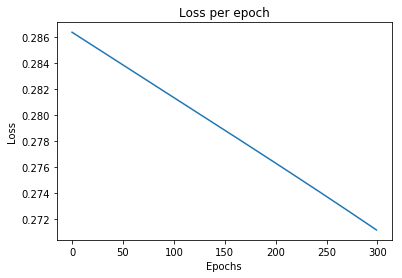

Accuracy: 75.26%
Epoch: 0, Training Accuracy: 75.26%
Epoch: 100, Training Accuracy: 76.06%
Epoch: 200, Training Accuracy: 76.78%


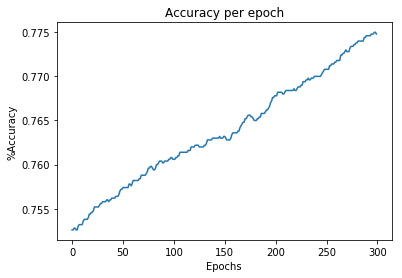

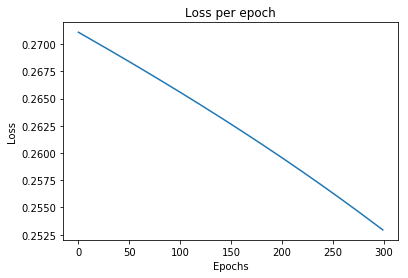

Accuracy: 77.48%
Epoch: 0, Training Accuracy: 77.48%
Epoch: 100, Training Accuracy: 78.40%
Epoch: 200, Training Accuracy: 79.34%


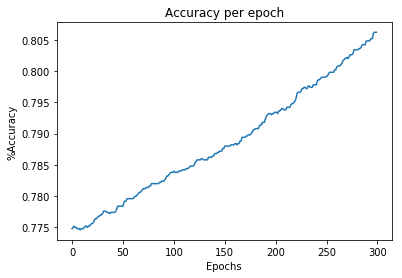

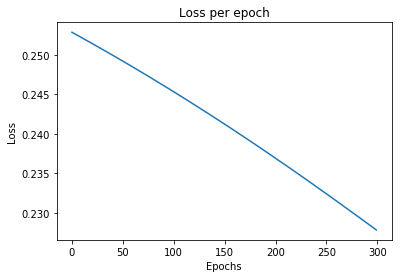

Accuracy: 80.62%


In [197]:
trainMLP = TrainMLP(0.1, 300)
training_data = train[:, 0:2]
training_labels = train[:, 2]
training_data = (training_data - np.mean(training_data))/(np.std(training_data))
W, W2, b, b2 = trainMLP.train(training_data[0:5000], training_labels[0:5000])

Accuracy: 81.94%


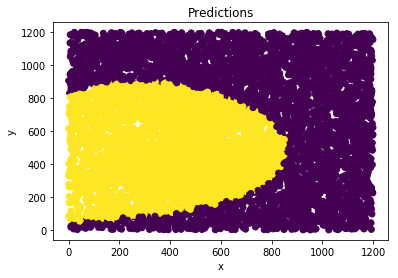

In [198]:
test_data = test[:, 0:2]
test_labels = test[:, 2]
test_data = (test_data - np.mean(test_data))/(np.std(test_data))
acc, preds = trainMLP.classification_accuracy(W, test_data, b, test_labels, W2, b2)
print("Accuracy: {0:.2f}%".format(acc*100))
preds = preds.reshape(preds.shape[0],)
preds = preds.tolist()
colors = ['red', 'green']
plt.scatter(x=test[:, 0], y=test[:, 1], c=preds[:])
plt.title('Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 1C

In [203]:
class TrainMLPBetter:
    def __init__(self, rate, epochs): #set the iterations and the descent rate
        super().__init__() 
        self.rate = rate
        self.epochs = epochs
    def forward(self, X, W, W2, b, b2):
        layer1Out = np.add(np.dot(W, np.transpose(X)),  b)
        layer1Out = np.transpose(layer1Out)
        activatedLayer = self.sigmoid_func(layer1Out)
        layer2Out = np.add(np.dot(W2, np.transpose(activatedLayer)),  b2)
        layer2Out = np.transpose(layer2Out)
        y_hat = self.sigmoid_func(layer2Out) #examples x output
        return y_hat, activatedLayer
    
    def train(self, X, y):
        classes = np.unique(y).size
        #X: examples, features
        firstLayer = 40
        output = 1
        W = np.random.randn(firstLayer, X.shape[1])*np.sqrt(2/firstLayer) #firstlayerneurons, features
        b = np.random.randn(firstLayer, 1)*np.sqrt(2/firstLayer) #firstLayer, 1 
        W2 = np.random.randn(output, firstLayer)*np.sqrt(2/output)
        b2 = np.random.randn(output, 1)*np.sqrt(2/output)
        losses = np.zeros(self.epochs)
        acc = np.zeros(self.epochs)
        for j in range(5):
            for i in range(self.epochs):
                #one forward and back pass
                y_hat, activated_layer = self.forward(X, W, W2, b, b2)
                grads = self.grad(X, y, b, y_hat, activated_layer, W2)
                W -= self.rate*grads[0]
                b -= self.rate*grads[1]
                W2 -= self.rate*grads[2]
                b2 -= self.rate*grads[3]
                losses[i] = self.loss(y_hat, y)
                acc[i] = self.classification_accuracy(W, X, b, y, W2, b2)[0]
                if i%100 == 0:
                    print("Epoch: {0}, Training Accuracy: {1:.2f}%".format(i, acc[i]*100))
            self.plot(losses, acc)
        return W, W2, b, b2
    
    def sigmoid_func(self, y_hat):
        return 1 / (1 + np.exp(-1*y_hat))
    def predict(self, W:np.ndarray, X: np.ndarray, b:np.ndarray, W2, b2):
        outputs = self.forward(X, W, W2, b, b2)[0]
        outputs[outputs > 0.5] = 1
        outputs[outputs <= 0.5] = 0
        return outputs
    def loss(self, outputs: np.ndarray, y: np.ndarray):
        observations = y.shape[0]
        return -1*(np.dot(y, np.log(outputs)))/observations

    def grad(self, X, y, b, y_hat, activation, W2):
        
        samples = X.shape[0] #examples
        #Backpropagation of cross entropy loss
        y = y.reshape(y_hat.shape)
        #print(b.shape, W2.shape, activation.shape)
        grad_e_y = -(y/y_hat) + ((1-y)/(1-y_hat))# examples x ouput
        
        grad_e_w2 = (1/samples) * np.dot(np.transpose(np.multiply(grad_e_y, y_hat*(1-y_hat))), activation) #average across all samples
        grad_y_b2 = (y_hat)*(1-y_hat)
        grad_e_b2 = (1/samples) * np.dot(np.transpose(grad_e_y), grad_y_b2) #average across all samples
        grad_e_y2 = np.dot(np.multiply(grad_e_y, y_hat*(1-y_hat)), W2) #chain rule 5000x1 5000x1 1 x10
        sigmoid_derv = activation*(1-activation)
        grad_e_w1 = (1/samples) * np.dot(np.transpose(np.multiply(grad_e_y2, sigmoid_derv)), X)
        grad_y2_b1 = sigmoid_derv
        grad_e_b1 = (1/samples) * np.sum(np.multiply(grad_e_y2, grad_y2_b1), axis = 0)
        
        return grad_e_w1, grad_e_b1.reshape(grad_e_b1.shape[0], 1), grad_e_w2, grad_e_b2.reshape(grad_e_b2.shape[0], 1)
    
    def classification_accuracy(self, W:np.ndarray, X: np.ndarray, b:np.ndarray, y: np.ndarray, W2, b2):
        pred = self.predict(W, X, b, W2, b2)
        samples = y.shape[0]
        count = 0
        for i in range(samples):
            if pred[i] == y[i]:
                count = count + 1
        return count/samples, pred
    
    def plot(self, loss, acc):
        
        plt.plot(acc)
        plt.title('Accuracy per epoch')
        plt.xlabel('Epochs')
        plt.ylabel('%Accuracy')
        plt.show()
        
        plt.plot(loss)
        plt.title('Loss per epoch')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()
        
        print('Accuracy: ' + str(acc[-1]*100) + '%')

Epoch: 0, Training Accuracy: 49.92%
Epoch: 100, Training Accuracy: 63.30%
Epoch: 200, Training Accuracy: 65.28%


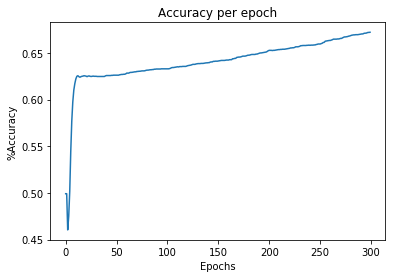

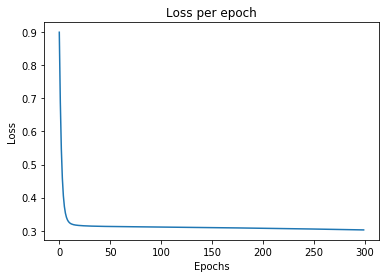

Accuracy: 67.22%
Epoch: 0, Training Accuracy: 67.26%
Epoch: 100, Training Accuracy: 69.62%
Epoch: 200, Training Accuracy: 72.42%


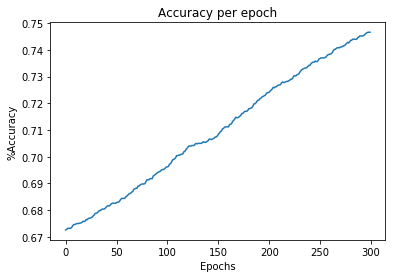

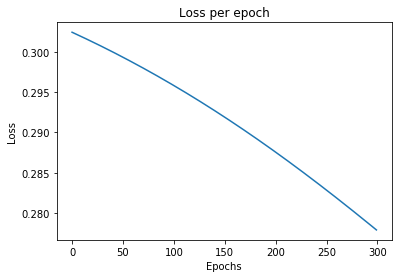

Accuracy: 74.66000000000001%
Epoch: 0, Training Accuracy: 74.66%
Epoch: 100, Training Accuracy: 76.74%
Epoch: 200, Training Accuracy: 78.90%


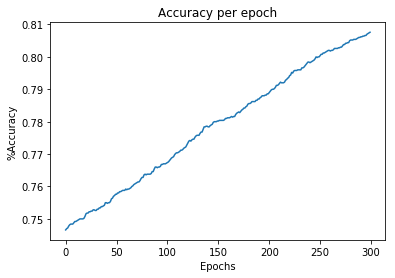

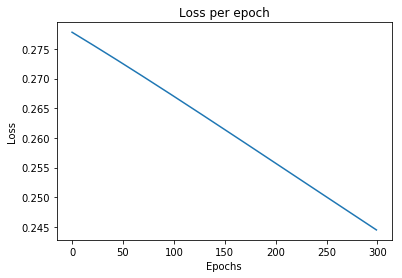

Accuracy: 80.76%
Epoch: 0, Training Accuracy: 80.80%
Epoch: 100, Training Accuracy: 81.64%
Epoch: 200, Training Accuracy: 82.70%


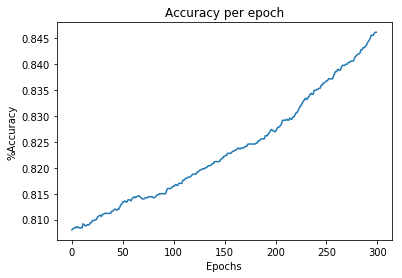

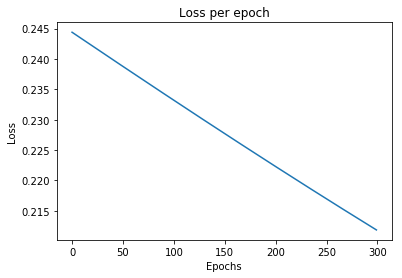

Accuracy: 84.61999999999999%
Epoch: 0, Training Accuracy: 84.64%
Epoch: 100, Training Accuracy: 85.86%
Epoch: 200, Training Accuracy: 86.86%


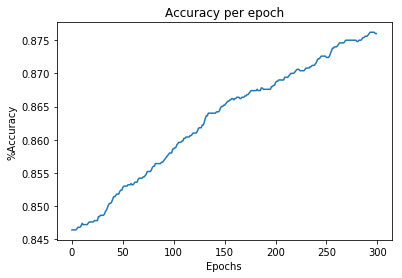

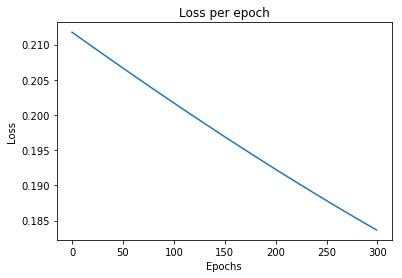

Accuracy: 87.6%


In [204]:
trainMLPBetter = TrainMLPBetter(0.1, 300)
training_data = train[:, 0:2]
training_labels = train[:, 2]
training_data = (training_data - np.mean(training_data))/(np.std(training_data))
W, W2, b, b2 = trainMLPBetter.train(training_data[0:5000], training_labels[0:5000])

Accuracy: 89.43%


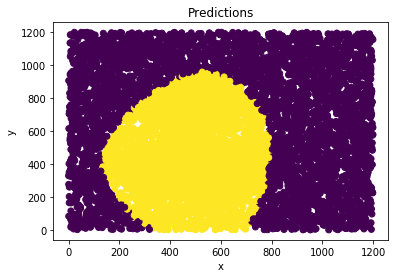

In [205]:
acc, preds = trainMLPBetter.classification_accuracy(W, test_data, b, test_labels, W2, b2)
print("Accuracy: {0:.2f}%".format(acc*100))
preds = preds.reshape(preds.shape[0],)
preds = preds.tolist()
colors = ['red', 'green']
plt.scatter(x=test[:, 0], y=test[:, 1], c=preds[:])
plt.title('Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.show()